In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv('train_agriculture.csv')

In [4]:
ds.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
ds.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
ds.drop('ID',axis=1,inplace=True)

In [7]:
for i in ds.columns:
    print("\033[1m"+i+"\033[0m",ds[i].unique())
    print('----------')

Estimated_Insects_Count [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
----------
Crop_Type [1 0]
----------
Soil_Type [0 1]
----------
Pesticide_Use_Category [1 3 2]
----------
Number_Doses_Week [ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
----------
Number_Weeks_Used [ 0. nan 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35.
 32. 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43.
 50. 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59.
 64. 13.  7.  5. 12.  6.  9. 58. 11. 65.]
----------
Number_Weeks_Quit [ 0  1  9  4 13  3 14  6  2 12 15 10  8 11  7  5 17 18 16 20 21 19 22 24
 23 27 25 28 26 29 30 31 33 32 36 3

In [8]:
ds.shape

(4599, 9)

In [9]:
num_col = ['Estimated_Insects_Count','Number_Weeks_Used','Number_Weeks_Quit','Number_Doses_Week']
cat_col = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
target  = ['Crop_Damage ']

In [10]:
print(ds.isna().sum())
print(ds.isnull().sum())

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64


In [11]:
ds['Number_Weeks_Used'].fillna(ds['Number_Weeks_Used'].mean(),inplace=True)

In [12]:
print(ds.isna().sum())
print(ds.isnull().sum())

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64


In [13]:
num_ds = ds[['Estimated_Insects_Count','Number_Weeks_Used','Number_Weeks_Quit','Number_Doses_Week']]

In [14]:
num_ds.describe()

,Estimated_Insects_Count,Number_Weeks_Used,Number_Weeks_Quit,Number_Doses_Week
count,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,28.891027,9.205479,26.477495
std,814.439120,11.965785,9.713253,15.524647
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,20.000000,0.000000,15.000000
50%,1212.000000,28.891027,7.000000,20.000000
75%,1786.000000,36.000000,16.000000,40.000000
max,4097.000000,66.000000,47.000000,95.000000


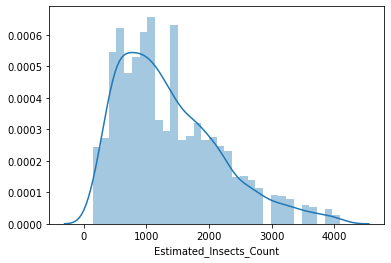

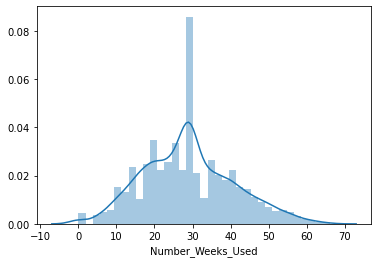

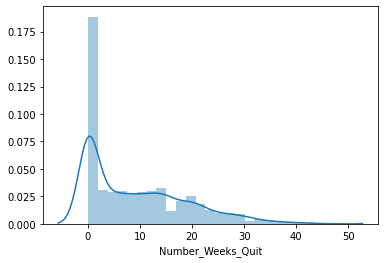

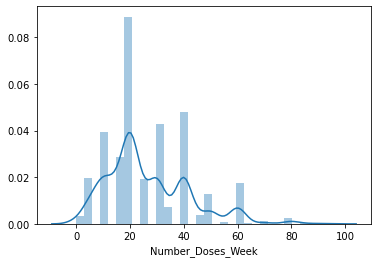

In [15]:
for i in num_col:
    sns.distplot(ds[i])
    plt.show()

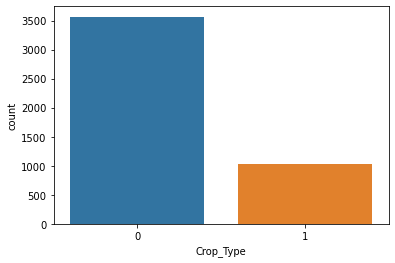

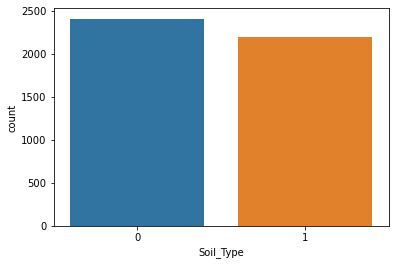

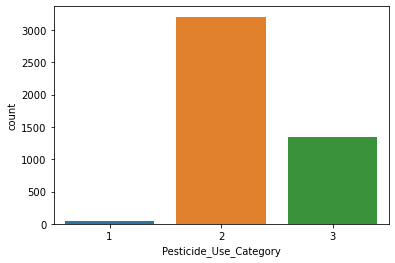

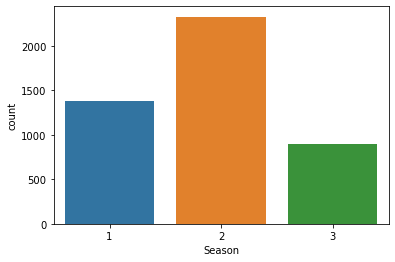

In [16]:
for i in cat_col:
    sns.countplot(ds[i])
    plt.show()

In [17]:
ds['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

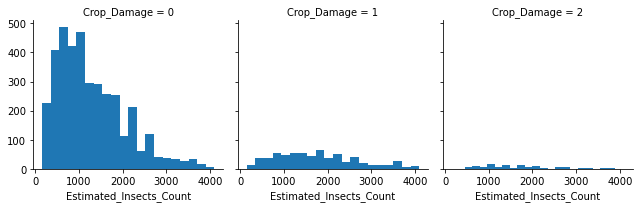

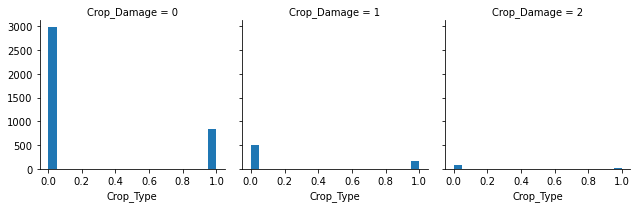

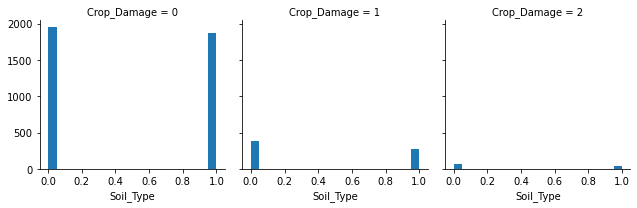

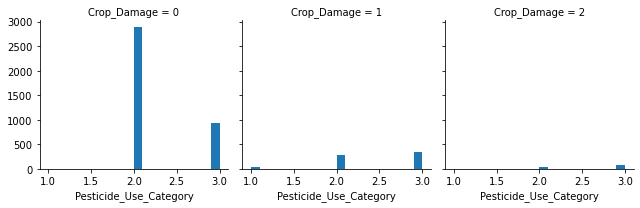

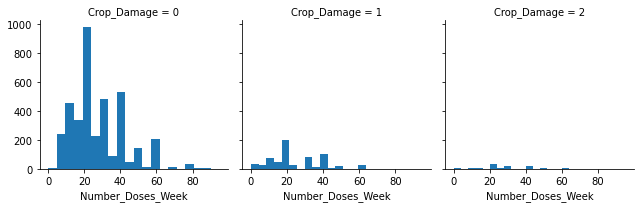

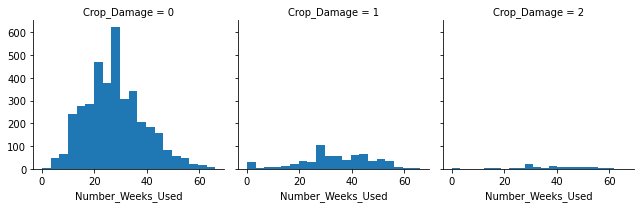

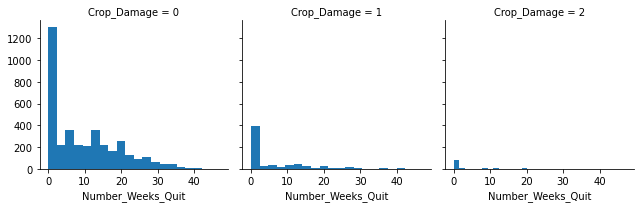

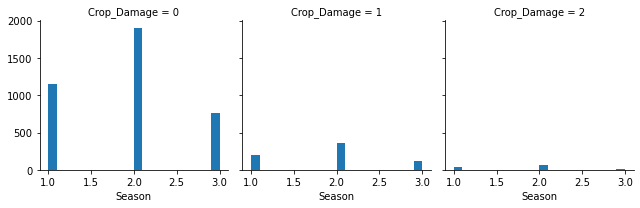

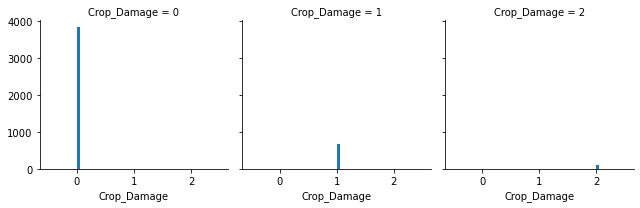

In [18]:
for i in ds.columns:
    g = sns.FacetGrid(ds, col='Crop_Damage')
    g.map(plt.hist, i, bins=20)

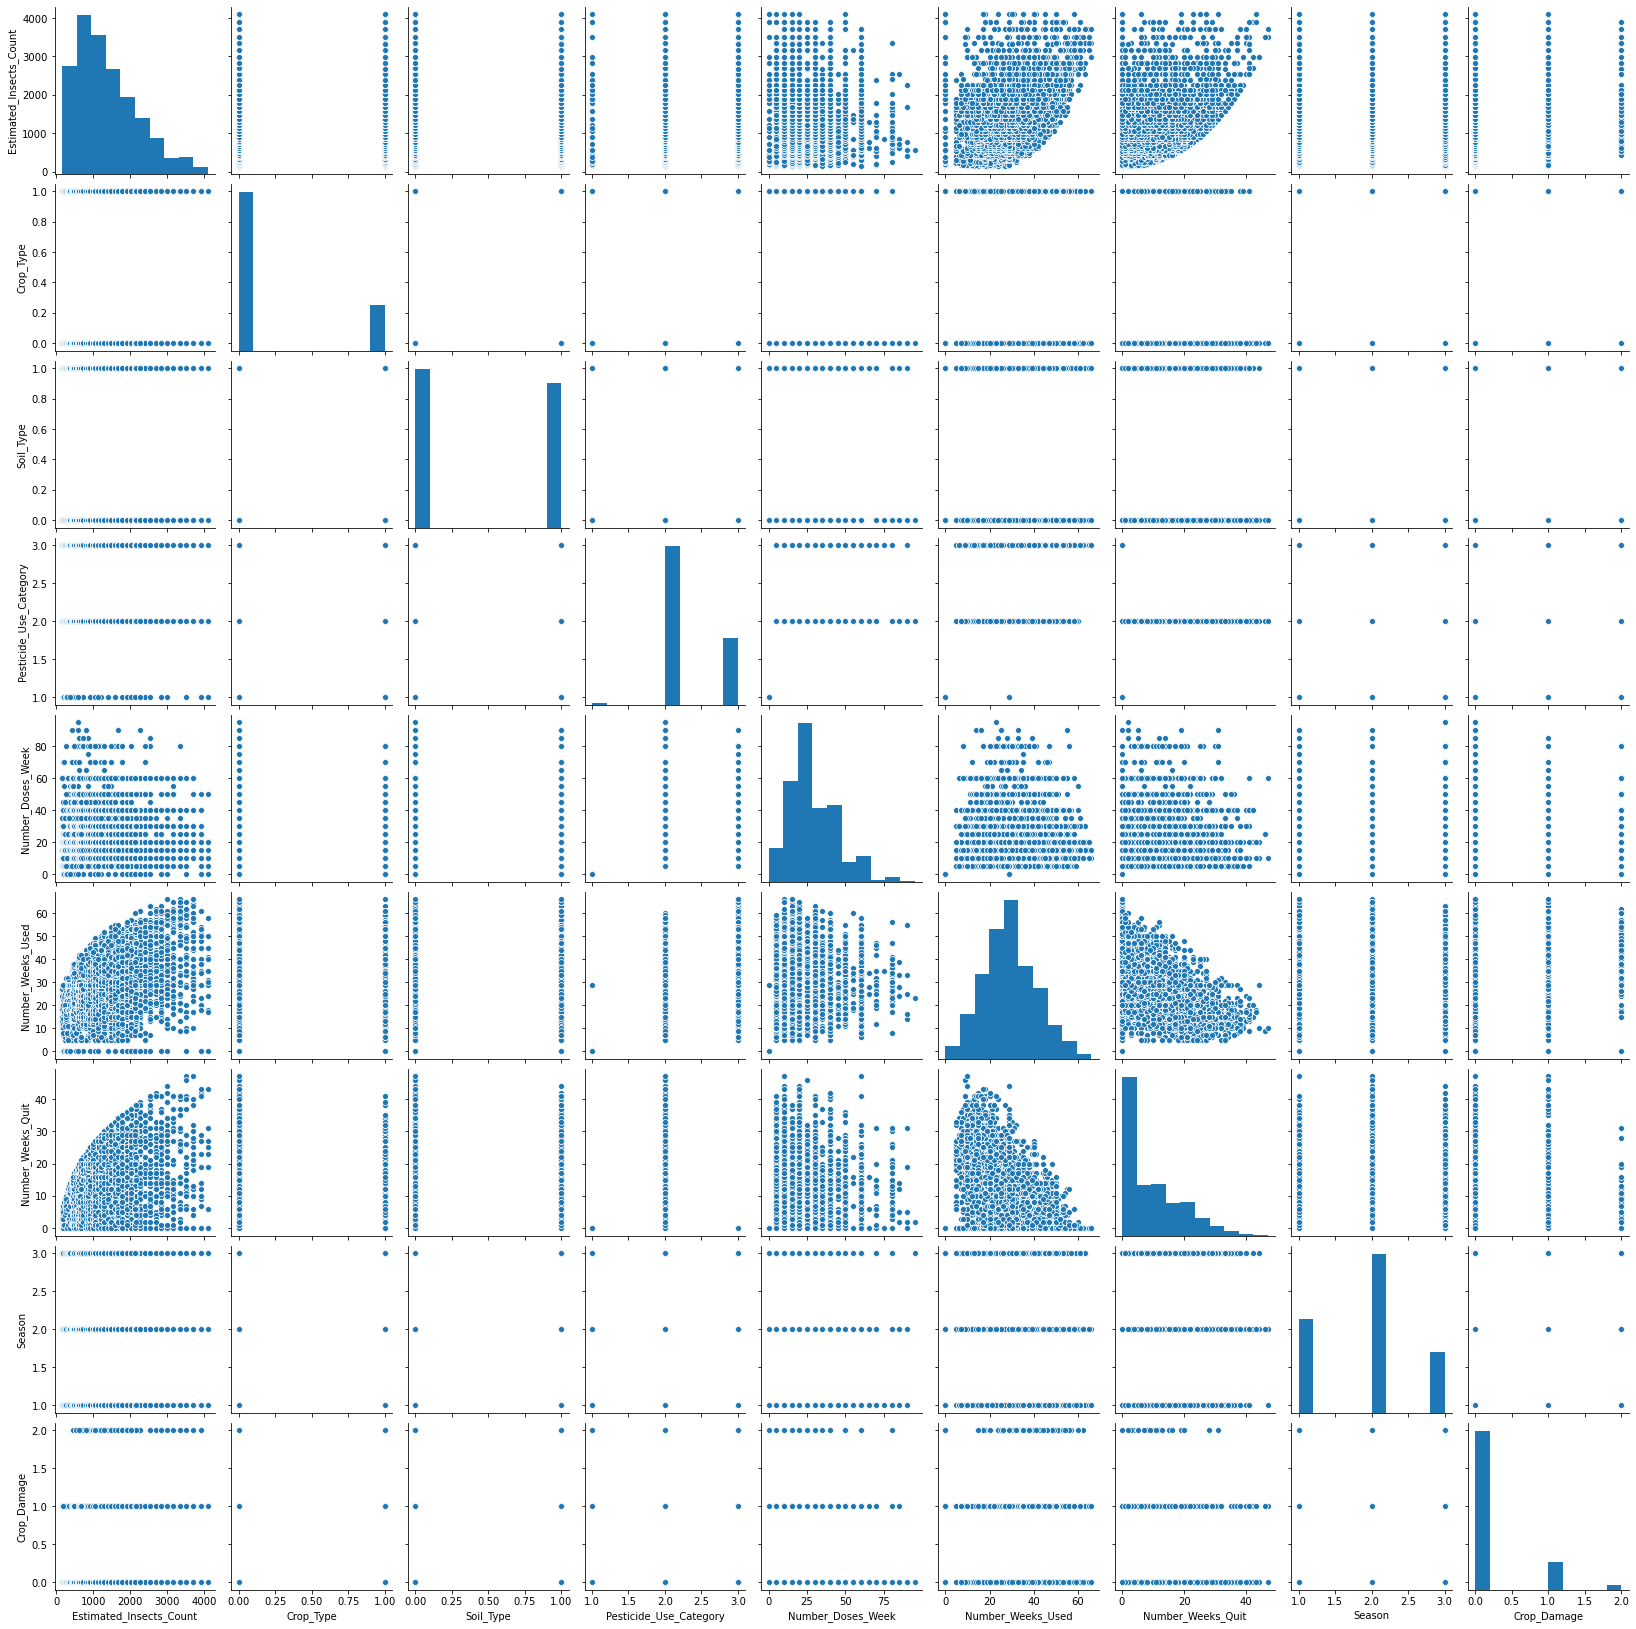

In [19]:
sns.pairplot(ds)

In [20]:
ds_corr=pd.DataFrame(ds.corr())

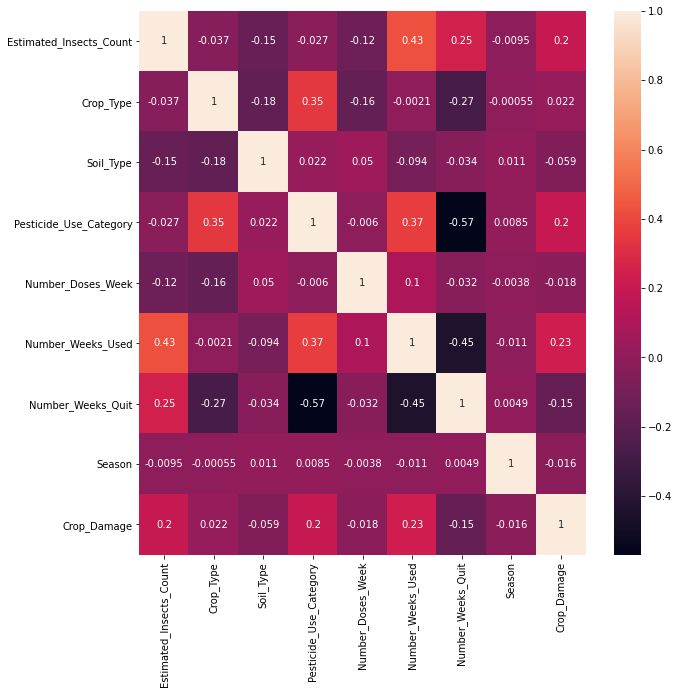

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),color='k',annot=True)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale = sc.fit_transform(ds[num_col])
scale = pd.DataFrame(scale,columns=num_col)

In [23]:
ds_original=ds
ds=ds.drop(columns=num_col,axis=1)
ds_fin=ds.merge(scale,left_index=True,right_index=True,how='left')
ds_fin.head()

,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage,Estimated_Insects_Count,Number_Weeks_Used,Number_Weeks_Quit,Number_Doses_Week
0,1,0,1,1,0,-1.442868,-2.414732,-0.947827,-1.705699
1,1,0,1,2,1,-1.417081,-2.414732,-0.947827,-1.705699
2,1,0,1,2,1,-1.358138,-2.414732,-0.947827,-1.705699
3,1,1,1,2,1,-1.358138,-2.414732,-0.947827,-1.705699
4,1,0,1,2,1,-1.253760,-2.414732,-0.947827,-1.705699


In [24]:
ds_fin=ds_fin[['Crop_Type','Soil_Type','Pesticide_Use_Category','Season','Estimated_Insects_Count','Number_Weeks_Used','Number_Weeks_Quit','Number_Doses_Week','Crop_Damage']]

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [26]:
x=ds_fin.iloc[:,:-1]
y=ds_fin['Crop_Damage']
print(x.shape,y.shape)
#divide data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22,random_state=43)
ds['Crop_Damage'].shape

(4599, 8) (4599,)


(4599,)

In [27]:
from sklearn import svm

In [28]:
svc=svm.SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred),classification_report(y_test,svc_pred))

0.849802371541502
[[858   3   0]
 [121   2   0]
 [ 28   0   0]]               precision    recall  f1-score   support

           0       0.85      1.00      0.92       861
           1       0.40      0.02      0.03       123
           2       0.00      0.00      0.00        28

    accuracy                           0.85      1012
   macro avg       0.42      0.34      0.32      1012
weighted avg       0.77      0.85      0.79      1012



C:\Users\atakle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred),classification_report(y_test,knn_pred))

0.8241106719367589
[[812  49   0]
 [101  22   0]
 [ 24   4   0]]               precision    recall  f1-score   support

           0       0.87      0.94      0.90       861
           1       0.29      0.18      0.22       123
           2       0.00      0.00      0.00        28

    accuracy                           0.82      1012
   macro avg       0.39      0.37      0.38      1012
weighted avg       0.77      0.82      0.80      1012



C:\Users\atakle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc),classification_report(y_test,pred_rfc))

0.8290513833992095
[[815  44   2]
 [ 96  24   3]
 [ 23   5   0]]               precision    recall  f1-score   support

           0       0.87      0.95      0.91       861
           1       0.33      0.20      0.24       123
           2       0.00      0.00      0.00        28

    accuracy                           0.83      1012
   macro avg       0.40      0.38      0.38      1012
weighted avg       0.78      0.83      0.80      1012



x=ds_fin.iloc[:,:-1]
y=ds_fin['Crop_Damage']

from sklearn import svm
svc=svm.SVC()
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf'),'C':[0.01,0.1,1,10,100]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_params_)

from sklearn import svm

svc=svm.SVC(kernel='linear')
svc.fit(x,y)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
knn.fit(x,y)

In [31]:
ds_test = pd.read_excel('test_agriculture.xlsx')

In [32]:
ds_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [33]:
ds_test=ds_test[['Crop_Type','Soil_Type','Pesticide_Use_Category','Season','Estimated_Insects_Count','Number_Weeks_Used','Number_Weeks_Quit','Number_Doses_Week']]

In [34]:
ds_test.isna().sum()

Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Season                       0
Estimated_Insects_Count      0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Number_Doses_Week            0
dtype: int64

In [35]:
ds_test['Number_Weeks_Used'].fillna(ds_test['Number_Weeks_Used'].mean(),inplace=True)

In [36]:
ds_test.isna().sum()

Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Season                     0
Estimated_Insects_Count    0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Number_Doses_Week          0
dtype: int64

In [37]:
pred_test_rfc=rfc.predict(ds_test)

In [39]:
pred_test_knn = knn.predict(ds_test)

In [40]:
pred_test_svc = svc.predict(ds_test)

In [41]:
pd.DataFrame(pred_test_rfc).to_csv('agri_pred_rfc')
pd.DataFrame(pred_test_rfc).to_csv('pred_test_knn')
pd.DataFrame(pred_test_rfc).to_csv('pred_test_svc')

In [42]:
#finalize and save the model
import joblib
joblib.dump(svc,'agri_svc.pkl')
joblib.dump(knn,'agri_knn.pkl')
joblib.dump(rfc,'agri_rfc.pkl')

['agri_rfc.pkl']